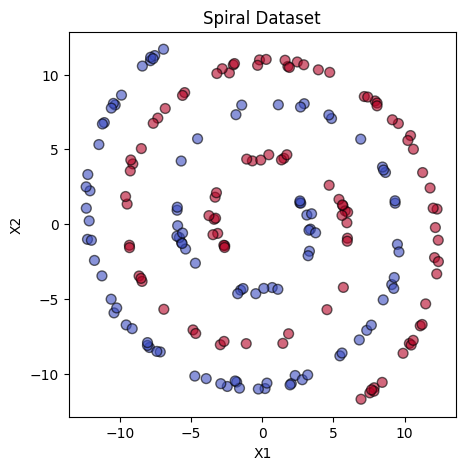

In [2]:
# spiral dataset

import numpy as np
import matplotlib.pyplot as plt

def make_spirals(n_points=100, noise=0.5):
    """
    Generate spiral dataset with two classes.

    Parameters:
    - n_points (int): Number of points per spiral.
    - noise (float): Standard deviation of Gaussian noise added to the data.

    Returns:
    - X (array): Input features (2D).
    - y (array): Target labels.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    X = np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y))))
    y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    return X, y

# Generate spiral dataset
X, y = make_spirals()

# Plot spirals
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.6)
plt.title("Spiral Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



# Split data for validation: K-Fold cross validation

In [8]:
from sklearn.model_selection import KFold
X1 = np.random.randn(10, 2)

cv = KFold(n_splits=5)

for train_idx, val_idx in cv.split(X1):
    print("Train = {} | Validation ={}".format(train_idx, val_idx))

Train = [2 3 4 5 6 7 8 9] | Validation =[0 1]
Train = [0 1 4 5 6 7 8 9] | Validation =[2 3]
Train = [0 1 2 3 6 7 8 9] | Validation =[4 5]
Train = [0 1 2 3 4 5 8 9] | Validation =[6 7]
Train = [0 1 2 3 4 5 6 7] | Validation =[8 9]


In [9]:
# k-fold problem
X1 = np.random.randn(9, 2)
y1 = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])

cv = KFold(n_splits=3)

for trn_idx, val_idx in cv.split(X1, y1):
    print("Train={} | Valid={} | Labels={}, {}".format(trn_idx, val_idx, y1[trn_idx], y1[val_idx]))

# if you have unbiased dataset maybe your model didint learn some classess, or train one class and test for another class that the model dont know that.

Train=[3 4 5 6 7 8] | Valid=[0 1 2] | Labels=[1 1 1 1 1 1], [0 0 0]
Train=[0 1 2 6 7 8] | Valid=[3 4 5] | Labels=[0 0 0 1 1 1], [1 1 1]
Train=[0 1 2 3 4 5] | Valid=[6 7 8] | Labels=[0 0 0 1 1 1], [1 1 1]


# Stratified K-Fold cross validation


- This cross-validation object is a variation of KFold that returns stratified folds.

- The folds are made by preserving the percentage of samples for each class.

In [10]:
X1 = np.random.randn(9, 2)
y1 = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])

cv = StratifiedKFold(n_splits=3)

for trn_idx, val_idx in cv.split(X1, y1):
    print("Train={} | Valid={} | Labels={}, {}".format(trn_idx, val_idx, y1[trn_idx], y1[val_idx]))

Train=[1 2 5 6 7 8] | Valid=[0 3 4] | Labels=[0 0 1 1 1 1], [0 1 1]
Train=[0 2 3 4 7 8] | Valid=[1 5 6] | Labels=[0 0 1 1 1 1], [0 1 1]
Train=[0 1 3 4 5 6] | Valid=[2 7 8] | Labels=[0 0 1 1 1 1], [0 1 1]


#  Cross Validation for hyper parameter tuning - Heatmap cross validation table

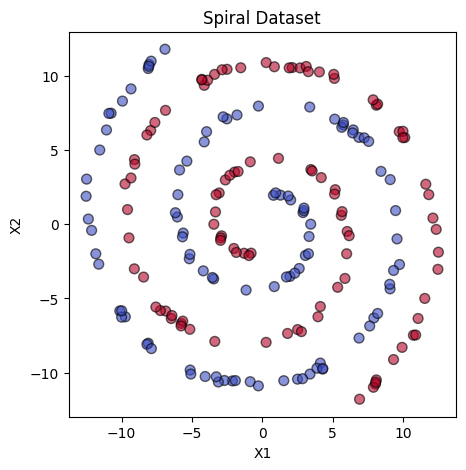

The best parameters are {'C': 10.0, 'gamma': 0.1} with a score of 1.00


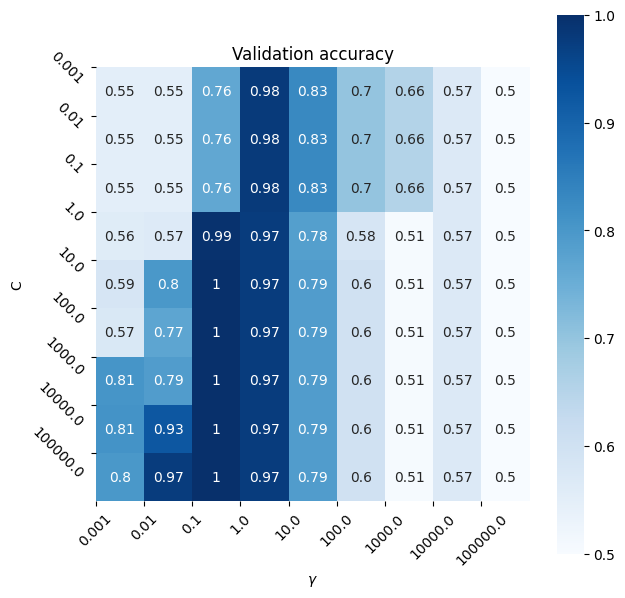

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Spiral dataset generation
def make_spirals(n_points=100, noise=0.5):
    """
    Generate spiral dataset with two classes.

    Parameters:
    - n_points (int): Number of points per spiral.
    - noise (float): Standard deviation of Gaussian noise added to the data.

    Returns:
    - X (array): Input features (2D).
    - y (array): Target labels.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    X = np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y))))
    y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    return X, y

# Generate spiral dataset
X, y = make_spirals()

# Plot spirals
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.6)
plt.title("Spiral Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Specify range of hyper-parameters
C_range = np.logspace(-3, 5, 9)   # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
gamma_range = np.logspace(-3, 5, 9)   # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
param_grid = dict(gamma=gamma_range, C=C_range)

# Split data for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create classifier
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

# Train
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


# The best parameters are {'C': 10.0, 'gamma': 0.1} with a score of 1.00

# Visualize validation accuracy
# # Draw heatmap of the validation accuracy as a function of gamma and C
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(7, 7))
sns.heatmap(scores, annot=True, cmap='Blues', square=True)
plt.xlabel('$\gamma$')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range, rotation=-45)
plt.title('Validation accuracy')
plt.show()


# Visualization hyper parameter tuning

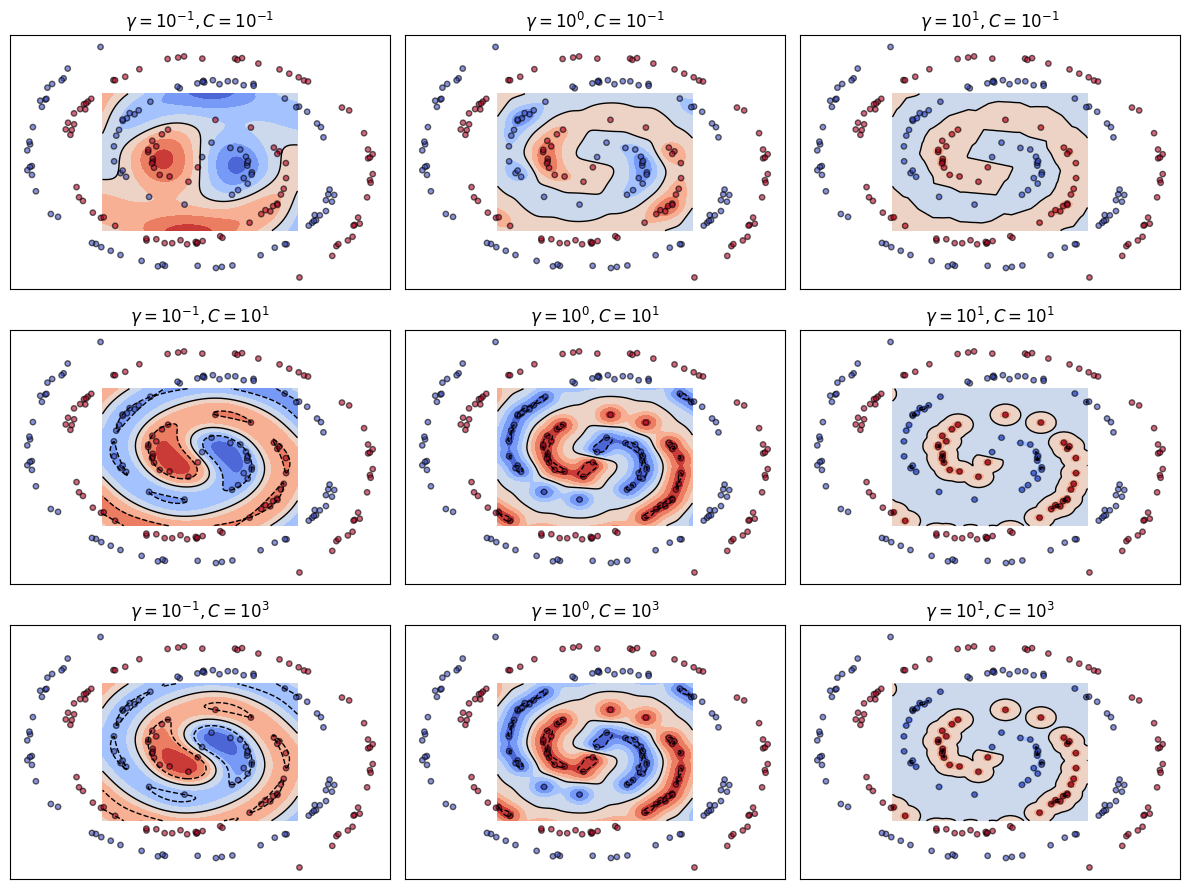

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Spiral dataset generation
def make_spirals(n_points=100, noise=0.5):
    """
    Generate spiral dataset with two classes.

    Parameters:
    - n_points (int): Number of points per spiral.
    - noise (float): Standard deviation of Gaussian noise added to the data.

    Returns:
    - X (array): Input features (2D).
    - y (array): Target labels.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    X = np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y))))
    y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    return X, y

# Generate spiral dataset
X, y = make_spirals()

# Parameter ranges
C_range = [0.1, 10, 1000]
gamma_range = [0.1, 1, 10]

classifiers = []

# Train classifiers for different values of C and gamma
for C in C_range:
    for gamma in gamma_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((clf, C, gamma))

plt.figure(figsize=(12, 9))
X1, X2 = np.meshgrid(np.linspace(-7, 7, 200), np.linspace(-7, 7, 200))

for i, (clf, C, gamma) in enumerate(classifiers, start=1):
    # Evaluate decision function in a grid
    Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # Visualize decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), i)
    plt.title("$\gamma = 10^{%d}, C = 10^{%d}$" % (np.log10(gamma), np.log10(C)))

    # Visualize parameter's effect on decision function
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm)
    plt.contour(X1, X2, Z, linewidths=1, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], s=15, c=y, edgecolors='k', cmap=plt.cm.coolwarm, alpha=0.6)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

plt.tight_layout()
plt.show()


# as you can see in the result almost the best hyperparameter tuning is {'C': 0.1 to 10.0, 'gamma': 0.1 to 1}


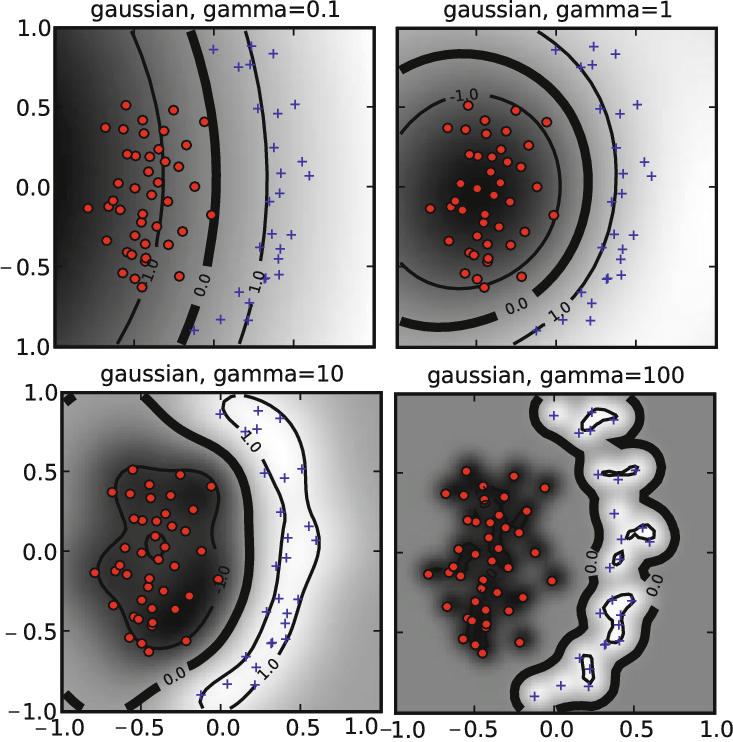

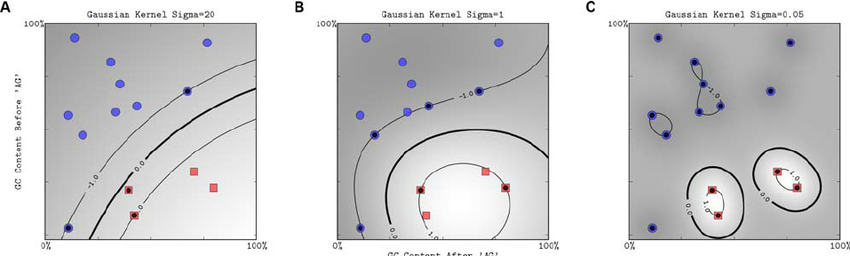

 visualize and interact with a non-linear SVM classifier using Gaussian kernels on synthetic data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import ipywidgets as widgets

# Generate some synthetic data for demonstration
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

fig, ax = plt.subplots(1)

X1, X2 = np.meshgrid(np.linspace(-7, 7, 200), np.linspace(-7, 7, 200))

def update_plot(C, gamma, show_svs, show_levels):
    ax.clear()

    # create and train SVM classifier
    clf = SVC(C=10**C, gamma=10**gamma)
    clf.fit(X, y)
    sv = clf.support_vectors_

    # compute contours
    Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # visualize parameter's effect on decision function
    ax.contourf(X1, X2, Z, cmap=plt.cm.coolwarm)

    # plot decision boundaries
    if show_levels:
        ax.contour(X1, X2, Z, linewidths=1, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', cmap=plt.cm.coolwarm, alpha=1.0)

    # plot support vectors
    if show_svs:
        sv = clf.support_vectors_
        ax.scatter(sv[:, 0], sv[:, 1], s=150, facecolors='none', edgecolors='k')

    title = "$\gamma = 10^{{{:1.0f}}}, C = 10^{{{:1.0f}}}, SV = {:d}$".format(gamma, C, len(sv))
    ax.set_title(title, size='large')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

C = widgets.FloatLogSlider(value=1, base=10, min=-3, max=5, step=1, description='C:')
gamma = widgets.FloatLogSlider(value=0, base=10, min=-3, max=5, step=1, description='gamma:')
show_svs = widgets.Checkbox(value=False, description='Show Support Vectors')
show_levels = widgets.Checkbox(value=True, description='Show Levels')

widgets.interact(update_plot, C=C, gamma=gamma, show_svs=show_svs, show_levels=show_levels)


interactive(children=(FloatLogSlider(value=1.0, description='C:', max=5.0, min=-3.0, step=1.0), FloatLogSlider…

<function __main__.update_plot(C, gamma, show_svs, show_levels)>